<a href="https://colab.research.google.com/github/Anmol-Singh-repo/palystore_data/blob/main/Playstore_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
path = kagglehub.dataset_download("lava18/google-play-store-apps")

print("path to dataset files:", path)

Using Colab cache for faster access to the 'google-play-store-apps' dataset.
path to dataset files: /kaggle/input/google-play-store-apps


In [50]:
data=pd.read_csv(path + '/googleplaystore.csv')
print("Dataset loaded properly")

Dataset loaded properly


In [51]:
print("data shape:", data.shape)

data shape: (10841, 13)


In [52]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [54]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [55]:
print("unique categ:", data['Category'].nunique())
print("Sample categ:", data['Category'].unique()[:20])

unique categ: 34
Sample categ: ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL']


In [56]:
print("Doublicate :", data.duplicated().sum())

Doublicate : 483


In [57]:
data.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [58]:
data['Rating'].fillna(data['Rating'].mean(),inplace=True)

/tmp/ipython-input-4048454680.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Rating'].fillna(data['Rating'].mean(),inplace=True)


In [59]:
data['Price']=data['Price'].astype(str).str.strip()
data['Installs']=data['Installs'].astype(str).str.strip()
data['Reviews']=data['Reviews'].astype(str).str.strip()


data['Price']=data['Price'].str.replace('$',"",regex=False)
data['Price']=pd.to_numeric(data['Price'],errors='coerce')

data['Installs']=data['Installs'].str.replace('+',"",regex=False)
data['Installs']=data['Installs'].str.replace(',',"",regex=False)
data['Installs']=pd.to_numeric(data['Installs'],errors='coerce')

data['Reviews']=pd.to_numeric(data['Reviews'],errors='coerce')

data.dropna(subset=['Price','Installs','Reviews'],inplace=True)

print("Data Type Cleaning Done")
data[['App','Price','Installs','Reviews']].head()

Data Type Cleaning Done


,App,Price,Installs,Reviews
0,Photo Editor & Candy Camera & Grid & ScrapBook,0.0,10000.0,159.0
1,Coloring book moana,0.0,500000.0,967.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0.0,5000000.0,87510.0
3,Sketch - Draw & Paint,0.0,50000000.0,215644.0
4,Pixel Draw - Number Art Coloring Book,0.0,100000.0,967.0


In [60]:
data['isPaid']=data['Type'].apply(lambda x:1 if x=='Paid' else 0)
data[['App','Type','isPaid']].head()

,App,Type,isPaid
0,Photo Editor & Candy Camera & Grid & ScrapBook,Free,0
1,Coloring book moana,Free,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Free,0
3,Sketch - Draw & Paint,Free,0
4,Pixel Draw - Number Art Coloring Book,Free,0


In [61]:
data.to_csv('new_playstore.csv',index=False)
print("Cleaned Dataset Saved as new_playstore.csv")

Cleaned Dataset Saved as new_playstore.csv


In [62]:
data=pd.read_csv('new_playstore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,isPaid
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0


In [63]:
sns.set(style="whitegrid")

print("Shape:",data.shape)

Shape: (10840, 14)


In [64]:
data.describe()

,Rating,Reviews,Installs,Price,isPaid
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000,10840.000000
mean,4.191972,4.441529e+05,1.546434e+07,1.027368,0.073801
std,0.478907,2.927761e+06,8.502936e+07,15.949703,0.261458
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000,0.000000
50%,4.200000,2.094000e+03,1.000000e+05,0.000000,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,1.000000


Top 10 Categories:
 Category
FAMILY             1972
GAME               1144
TOOLS               843
MEDICAL             463
BUSINESS            460
PRODUCTIVITY        424
PERSONALIZATION     392
COMMUNICATION       387
SPORTS              384
LIFESTYLE           382
Name: count, dtype: int64


/tmp/ipython-input-2665503326.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Top_categories.values,y=Top_categories.index,palette='viridis')


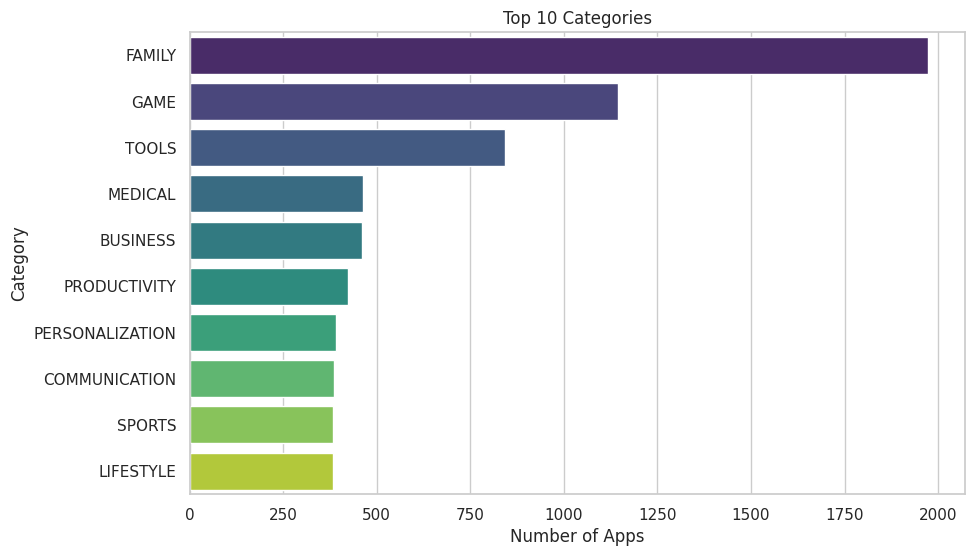

In [65]:
Top_categories=data['Category'].value_counts().head(10)
print("Top 10 Categories:\n",Top_categories)


plt.figure(figsize=(10,6))
sns.barplot(x=Top_categories.values,y=Top_categories.index,palette='viridis')
plt.title('Top 10 Categories')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

Average Ratings by Category:
 Category
EDUCATION              4.387778
EVENTS                 4.363647
ART_AND_DESIGN         4.350462
BOOKS_AND_REFERENCE    4.311026
PERSONALIZATION        4.307603
GAME                   4.282506
PARENTING              4.282223
HEALTH_AND_FITNESS     4.266296
BEAUTY                 4.260882
SHOPPING               4.254052
Name: Rating, dtype: float64


/tmp/ipython-input-3301915524.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.values,y=avg_rating.index,palette='viridis')


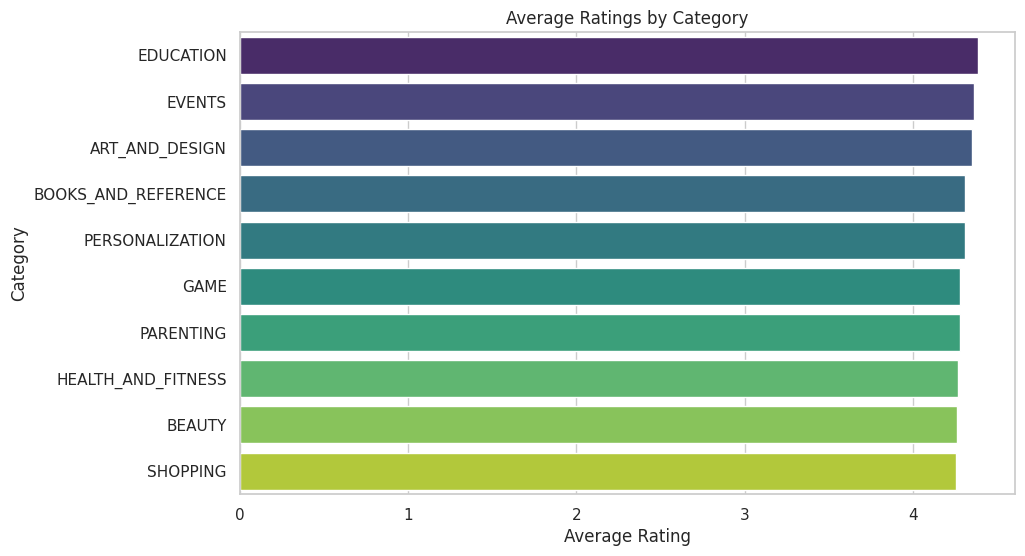

In [66]:
avg_rating=data.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
print("Average Ratings by Category:\n",avg_rating)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_rating.values,y=avg_rating.index,palette='viridis')
plt.title('Average Ratings by Category')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

App Types:
 Type
Free    10039
Paid      800
Name: count, dtype: int64


/tmp/ipython-input-427560953.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=app_types.index,y=app_types.values,palette='coolwarm')


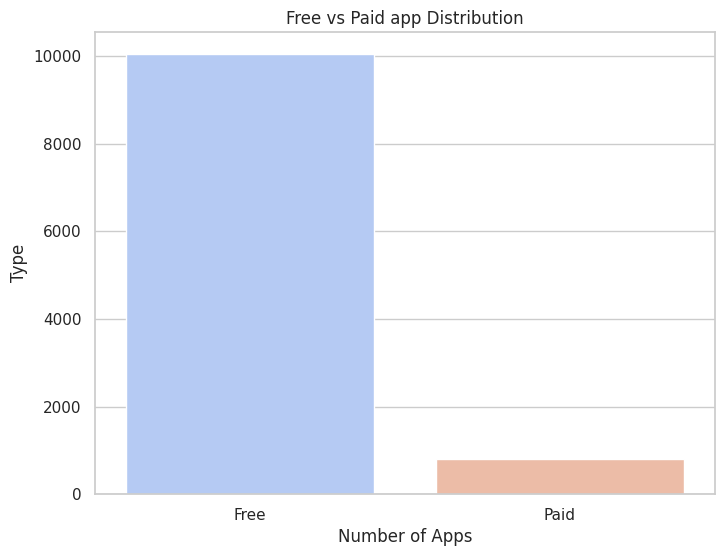

In [67]:
app_types=data['Type'].value_counts()
print("App Types:\n",app_types)

plt.figure(figsize=(8,6))
sns.barplot(x=app_types.index,y=app_types.values,palette='coolwarm')
plt.title('Free vs Paid app Distribution')
plt.xlabel('Number of Apps')
plt.ylabel('Type')
plt.show()

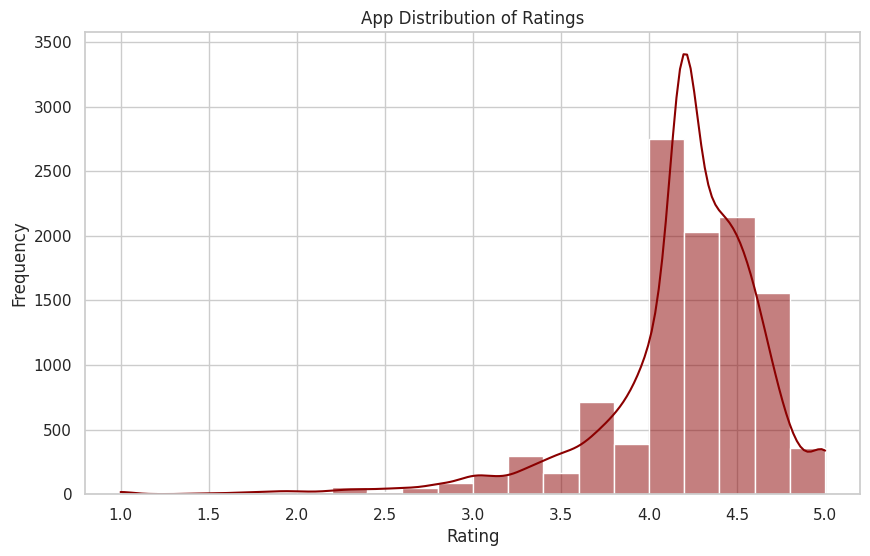

In [68]:
plt.figure(figsize=(10,6))
sns.histplot(data['Rating'],bins=20,kde=True,color='darkred')
plt.title('App Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

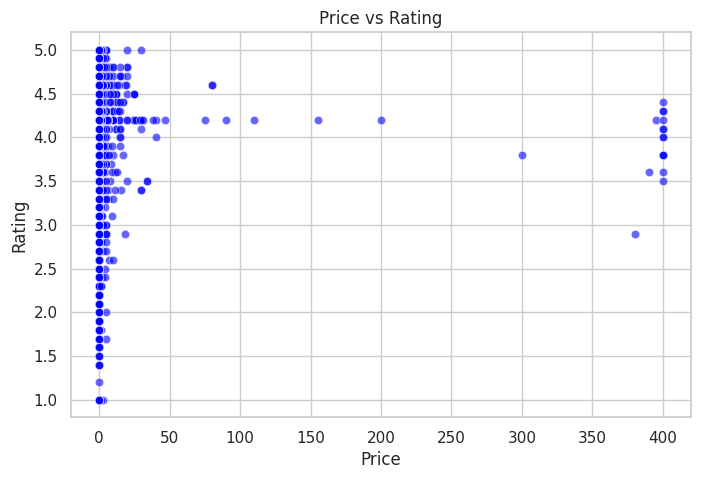

In [69]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Price',y='Rating',data=data,alpha=0.6,color='blue')
plt.title('Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

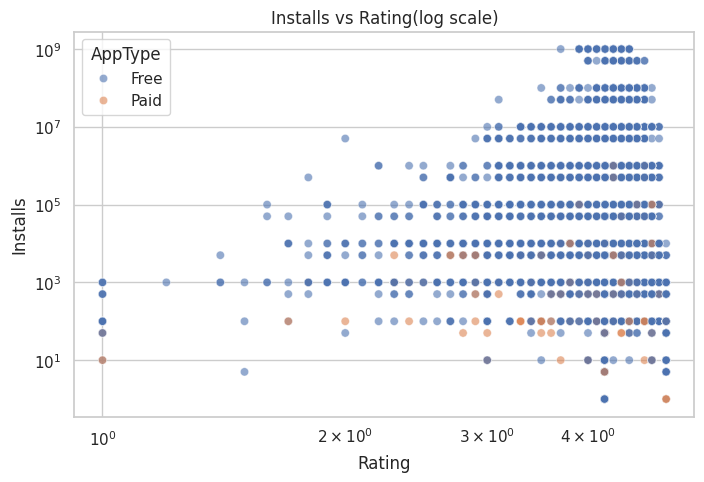

In [70]:
plt.figure(figsize=(8,5))
sns.scatterplot(y='Installs',x='Rating',data=data,alpha=0.6,color='red',hue='Type')
plt.xscale('log')
plt.yscale('log')
plt.title('Installs vs Rating(log scale)')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.legend(title='AppType')
plt.show()

Correlation Matrix:
             Rating   Reviews  Installs     Price    isPaid
Rating    1.000000  0.067950  0.051139 -0.020178  0.035737
Reviews   0.067950  1.000000  0.643122 -0.009667 -0.041699
Installs  0.051139  0.643122  1.000000 -0.011689 -0.051038
Price    -0.020178 -0.009667 -0.011689  1.000000  0.228200
isPaid    0.035737 -0.041699 -0.051038  0.228200  1.000000


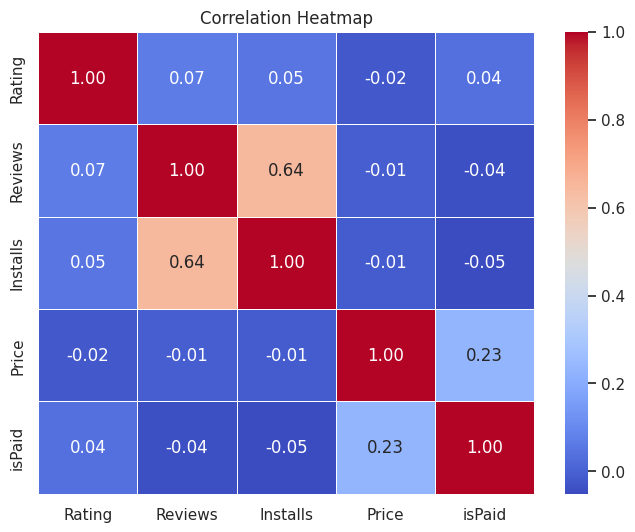

In [71]:
corr=data[['Rating','Reviews','Installs','Price','isPaid']].corr()
print("Correlation Matrix:\n",corr)

plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.5,fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [72]:
data.describe().to_csv('EDA_data.csv')
print("EDA Summary Saved as EDA_data.csv")

EDA Summary Saved as EDA_data.csv
